# Edge Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from scipy import signal
%matplotlib inline

def plot_images(image_list, title_list, subplot_shape=(1,1), axis='off', fontsize=30, figsize=(4,4), cmap=['gray']):
    plt.figure(figsize=figsize)
    for ii, im in enumerate(image_list):
        c_title = title_list[ii]
        if len(cmap) > 1:
            c_cmap = cmap[ii]
        else:
            c_cmap = cmap[0]
        plt.subplot(subplot_shape[0], subplot_shape[1],ii+1)
        plt.imshow(im, cmap=c_cmap)
        plt.title(c_title, fontsize=fontsize)
        plt.axis(axis)

## Sobel

Reading zebra.jpg image, converting it to gray scale and ploting the horizontal and vertical gradients using the Sobel operator.

In [2]:
zebra_img_gray = cv2.imread('zebra.jpg', 0)

# Generating horizontal gradient
sobelx = cv2.Sobel(zebra_img_gray, cv2.CV_64F, 1, 0, ksize=21)

# Generating vertical gradient
sobely = cv2.Sobel(zebra_img_gray, cv2.CV_64F, 0, 1, ksize=21)

In [3]:
# Generating gradient magnitude
magnitude = ((sobelx**2) + (sobely**2))**(0.5)

#Normalizing
magnitude = magnitude / magnitude.max()

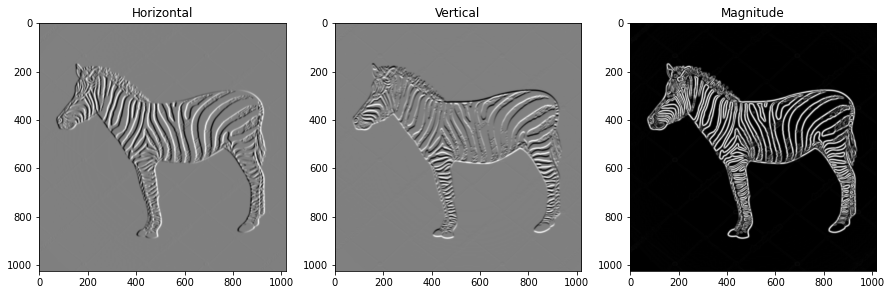

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(15,15))

axes[0].imshow(sobelx, cmap='gray')
axes[0].set_title('Horizontal')

axes[1].imshow(sobely, cmap='gray')
axes[1].set_title('Vertical')

axes[2].imshow(magnitude, cmap='gray')
axes[2].set_title('Magnitude');

## Smoothing

Reading zebra.jpg image, ploting in 3 different "soothness" levels using Gaussian Blur"

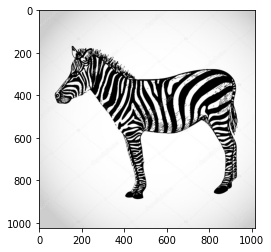

In [5]:
zebra_img = cv2.imread('zebra.jpg')
plt.imshow(zebra_img);

In [6]:
blur3 = cv2.GaussianBlur(zebra_img, (21,21), sigmaX=3.0, sigmaY=3.0)
blur5 = cv2.GaussianBlur(zebra_img, (21,21), sigmaX=5.0, sigmaY=5.0)
blur11 = cv2.GaussianBlur(zebra_img, (21,21), sigmaX=11.0, sigmaY=11.0)

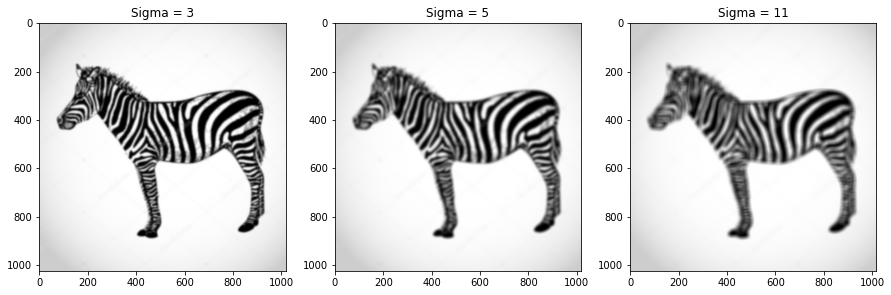

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(15,15))

axes[0].imshow(blur3)
axes[0].set_title('Sigma = 3')

axes[1].imshow(blur5)
axes[1].set_title('Sigma = 5')

axes[2].imshow(blur11)
axes[2].set_title('Sigma = 11');

**Note:** I chose the kernel size and the sigmas based on trial and error, until I got clear differences between the three images.

## Smoothing + Sobel
Plotting the gradient magnitude for those 3 different smoothness levels.

First, let's create the gradient magnitude for the three different smoothness levels:

In [8]:
blur3_gray = cv2.cvtColor(blur3, cv2.COLOR_BGR2GRAY)
sobelx3 = cv2.Sobel(blur3_gray, cv2.CV_64F, 1, 0, ksize=5)
sobely3 = cv2.Sobel(blur3_gray, cv2.CV_64F, 0, 1, ksize=5)
magnitude3 = ((sobelx3**2) + (sobely3**2))**(0.5)
magnitude3 = magnitude3 / magnitude3.max()

In [9]:
blur5_gray = cv2.cvtColor(blur5, cv2.COLOR_BGR2GRAY)
sobelx5 = cv2.Sobel(blur5_gray, cv2.CV_64F, 1, 0, ksize=15)
sobely5 = cv2.Sobel(blur5_gray, cv2.CV_64F, 0, 1, ksize=15)
magnitude5 = ((sobelx5**2) + (sobely5**2))**(0.5)
magnitude5 = magnitude5 / magnitude5.max()

In [10]:
blur11_gray = cv2.cvtColor(blur11, cv2.COLOR_BGR2GRAY)
sobelx11 = cv2.Sobel(blur11_gray, cv2.CV_64F, 1, 0, ksize=25)
sobely11 = cv2.Sobel(blur11_gray, cv2.CV_64F, 0, 1, ksize=25)
magnitude11 = ((sobelx11**2) + (sobely11**2))**(0.5)
magnitude11 = magnitude11 / magnitude11.max()

Now let's plot the gradient magnitudes:

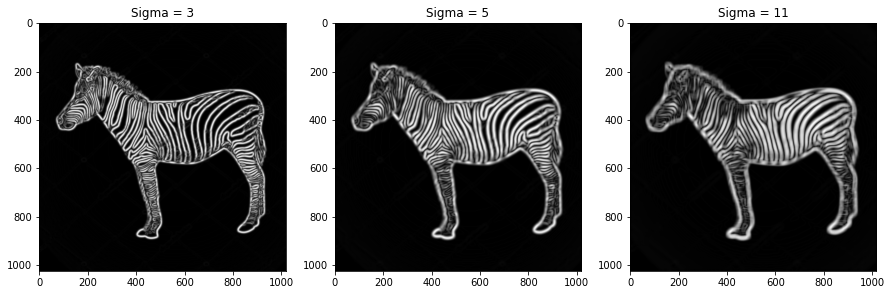

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15,15))

axes[0].imshow(magnitude3, cmap='gray')
axes[0].set_title('Sigma = 3')

axes[1].imshow(magnitude5, cmap='gray')
axes[1].set_title('Sigma = 5')

axes[2].imshow(magnitude11, cmap='gray')
axes[2].set_title('Sigma = 11');

We get that for the biggest sigma (11) the lines of the zebra are more dense and the cover line of the zebra is more outlined.  On the other hand, for the smallest sigma (3) the lines of the zebra are more slim and clear, and the cover line of the zebra is less outlined compared to the other line.

So for conclusion I would say that as sigma grows the animal outline is more noticeable (not neccessarily zebra, could be also other animal that has the shape of the zebra, such as a horse or a donkey), but as sigma decreases the lines of the zebra are more noticeable, and together with the cover line it becomes more clear that this is a zebra.

## Canny Edge Detection

Implementing Canny Edge Detection Algorithm from scratch.

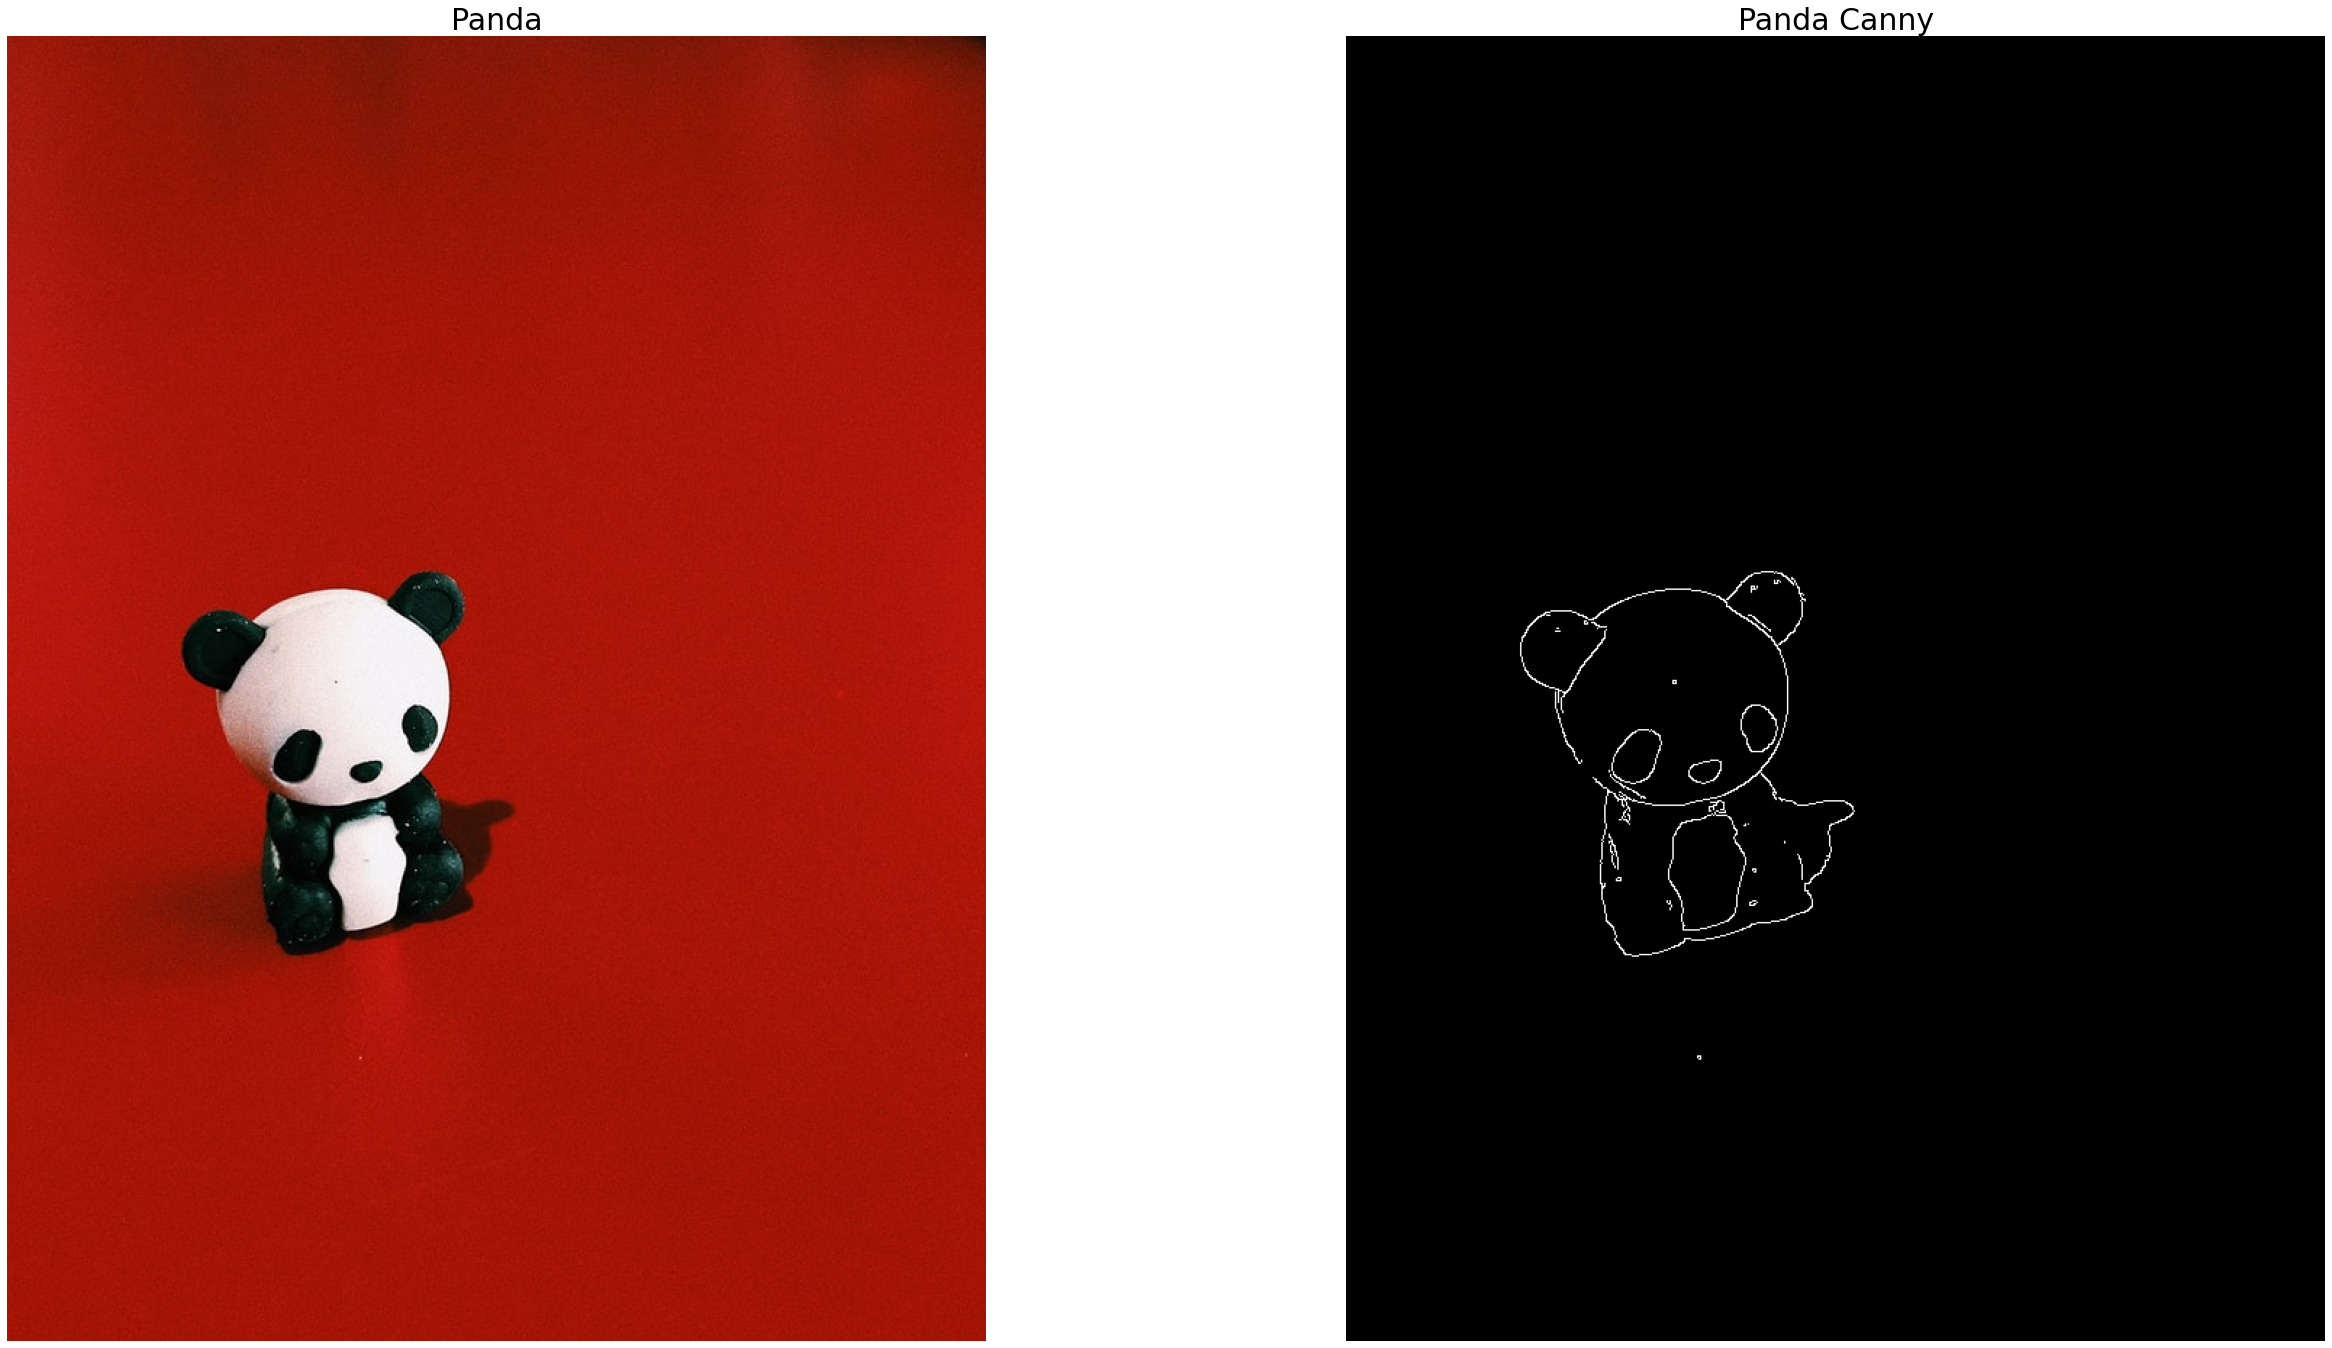

In [12]:
im = cv2.imread('tut_panda.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

im_canny = cv2.Canny(im, 100, 400)
plot_images([im,im_canny], ['Panda','Panda Canny'], subplot_shape=(1,3), figsize=(68,24))

#### 1. Noise Reduction

I'm using im_canny to find the slices with which I'll cut the image, since I don't want to use trial and error, but rather to use more functional approach.

In [13]:
# Cutting horizontaly
no_canny_rows = np.sum(im_canny, axis=1)
no_canny_rows_ind = np.where(no_canny_rows == 0)
cut_canny_tmp = np.delete(im, no_canny_rows_ind, 0)

In [14]:
# Cutting verticaly
no_canny_cols = np.sum(im_canny, axis=0)
no_canny_cols_ind = np.where(no_canny_cols == 0)
cut_canny = np.delete(cut_canny_tmp, no_canny_cols_ind, 1)

In [15]:
cut_canny = cv2.cvtColor(cut_canny, cv2.COLOR_RGB2GRAY)

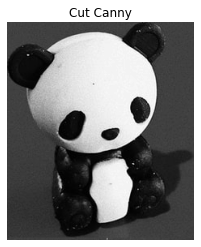

In [16]:
plt.imshow(cut_canny, cmap='gray')
plt.title('Cut Canny')
plt.axis('off');

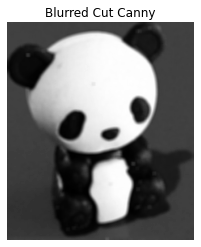

In [17]:
blur_canny = cv2.GaussianBlur(cut_canny, (5,5), sigmaX=3.0, sigmaY=3.0)
plt.imshow(blur_canny, cmap='gray')
plt.title('Blurred Cut Canny')
plt.axis('off');

#### 2. Finding Magnitude and Orientation of Gradient 

Creating gradient magnitude matrix. <br>
Creating a Theta matrix with the angels

In [18]:
sobelx_canny = cv2.Sobel(cut_canny, cv2.CV_64F, 1, 0, ksize=5)
sobely_canny = cv2.Sobel(cut_canny, cv2.CV_64F, 0, 1, ksize=5)
magnitude_canny = ((sobelx_canny**2) + (sobely_canny**2))**(0.5)
# Normalizing
magnitude_canny = magnitude_canny / magnitude_canny.max()

In [19]:
theta = np.arctan2(sobely_canny, sobelx_canny)

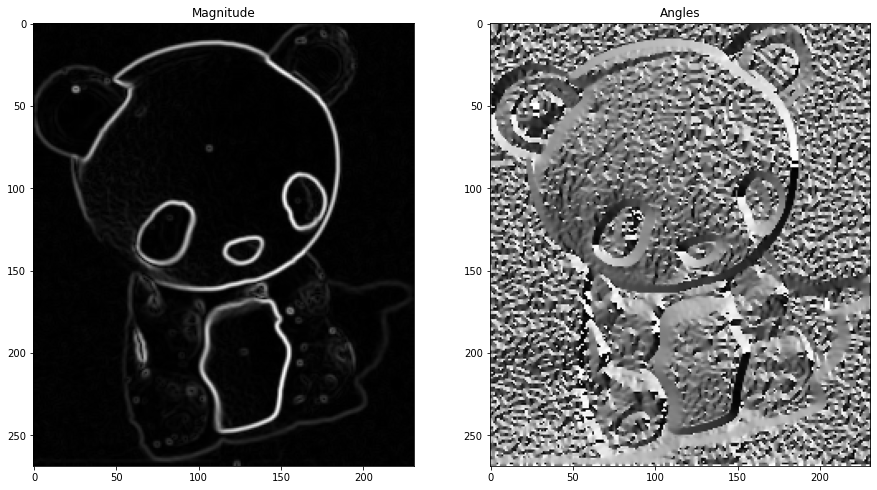

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15,15))

axes[0].imshow(magnitude_canny, cmap='gray')
axes[0].set_title('Magnitude')

axes[1].imshow(theta, cmap='gray')
axes[1].set_title('Angles');

**3. Non-Maximum Suppression**

First let's convert the angles matrix from radians to celcius, so that further calculations would be more comefortable:

In [21]:
theta_celcius = theta*180/np.pi

Now let's build non-max-supression function including a helper function:

In [22]:
def zeros_padding(mat):
    """
    Helper function to add padding to the 2d array"""
    rows_dim = mat.shape[0]

    cols_zeros = np.zeros(rows_dim)

    result = np.concatenate(((cols_zeros)[:, np.newaxis], mat), axis=1)
    result = np.hstack((result, cols_zeros.reshape(-1,1)))

    cols_dim = result.shape[1]

    rows_zeros = np.zeros(cols_dim)

    result = np.concatenate(((rows_zeros)[np.newaxis, :], result), axis=0)
    result = np.vstack((result, rows_zeros))
    
    return result

In [23]:
def non_max_supression(magnitude, angles):
    magnitude_with_padding = zeros_padding(magnitude)
    rows_dim, cols_dim = magnitude_with_padding.shape
    output = np.zeros((rows_dim-2, cols_dim-2))
    
    # Here I use the added padding such that I can go through the whole array including edges
    for row in range(1, rows_dim-1):
        for col in range(1, cols_dim-1):
            direction = angles[row-1, col-1]
            
            if (direction>0 and direction<=45) or (direction>180 and direction<=225):
                before = magnitude_with_padding[row+1, col-1]
                after = magnitude_with_padding[row-1, col+1]
                
            elif (direction>45 and direction<=90) or (direction>225 and direction<=270):
                before = magnitude_with_padding[row-1, col]
                after = magnitude_with_padding[row+1, col]
                
            elif (direction>90 and direction<=135) or (direction>270 and direction<=315):
                before = magnitude_with_padding[row-1, col-1]
                after = magnitude_with_padding[row+1, col+1]
                
            else:
                before = magnitude_with_padding[row, col-1]
                after = magnitude_with_padding[row, col+1]
                
            if magnitude_with_padding[row, col]>=before and magnitude_with_padding[row, col]>=after:
                output[row-1, col-1] = magnitude_with_padding[row, col]
                
    return output

In [24]:
nms_canny = non_max_supression(magnitude_canny, theta_celcius)

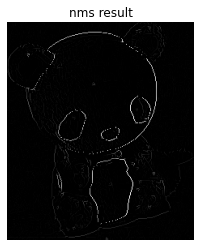

In [25]:
plt.imshow(nms_canny, cmap='gray')
plt.title('nms result')
plt.axis('off');

#### 4.i. Hysteresis Thresholding

First let's implement thresholding:

In [26]:
def thresholding(img, low, high, weak):
    output = np.zeros(img.shape)
    
    strong = 1
    
    strong_rows, strong_cols = np.where(img >= high)
    weak_rows, weak_cols = np.where((img >= low) & (img < high))
    
    output[strong_rows, strong_cols] = strong
    output[weak_rows, weak_cols] = weak
    
    return output

#### 4.2. Hysteresis Thresholding

Second let's implement hysteresis:

In [27]:
def checking_neighbors(img, row, col, strong):
    if (img[row-1, col-1] == strong) or (img[row-1, col] == strong) or (img[row-1, col+1] == strong) \
        or (img[row, col-1] == strong) or (img[row, col+1] == strong) or (img[row+1, col-1] == strong) \
        or (img[row+1, col] == strong) or (img[row+1, col+1] ==strong):
            return True
    else:
        return False

In [28]:
def hysteresis(img, weak):
    STRONG = 1
    
    rows, cols = img.shape
    
    top_left_to_bottom_right = img.copy()
    
    for row in range(1, rows-1):
        for col in range(1, cols-1):
            if top_left_to_bottom_right[row, col] == weak:
                if checking_neighbors(top_left_to_bottom_right, row, col, STRONG):
                    top_left_to_bottom_right[row, col] = STRONG
                else:
                    top_left_to_bottom_right[row, col] = 0
                    
    top_right_to_bottom_left = img.copy()
    
    for row in range(1, rows-1):
        for col in  range(cols-1, 1, -1):
            if top_right_to_bottom_left[row, col] == weak:
                if checking_neighbors(top_right_to_bottom_left, row, col, STRONG):
                    top_right_to_bottom_left[row, col] = STRONG
                else:
                    top_right_to_bottom_left[row, col] = 0
                    
    bottom_left_to_top_right = img.copy()
    
    for row in range(rows-2, 1, -1):
        for col in range(1, cols-1):
            if bottom_left_to_top_right[row, col] == weak:
                if checking_neighbors(bottom_left_to_top_right, row, col, STRONG):
                    bottom_left_to_top_right[row, col] = STRONG
                else:
                    bottom_left_to_top_right[row, col] = 0
                    
    bottom_right_to_top_left = img.copy()
    
    for row in range(rows-2, 1, -1):
        for col in range(cols-1, 1, -1):
            if bottom_right_to_top_left[row, col] == weak:
                if checking_neighbors(bottom_right_to_top_left, row, col, STRONG):
                    bottom_right_to_top_left[row, col] = STRONG
                else:
                    bottom_right_to_top_left[row, col] = 0
                    
    final = top_left_to_bottom_right + top_right_to_bottom_left + bottom_left_to_top_right \
            + bottom_right_to_top_left
    
    final[final > 1] = 1
    
    return final

Now, let's apply the functions on nms_canny for different hypermarameters values chosen randomly:

In [29]:
threshold_output1 = thresholding(nms_canny, 0.2, 0.8, 0.5)
hysteresis_output1 = hysteresis(threshold_output1, 0.5)

threshold_output2 = thresholding(nms_canny, 0.05, 0.9, 0.2)
hysteresis_output2 = hysteresis(threshold_output2, 0.4)

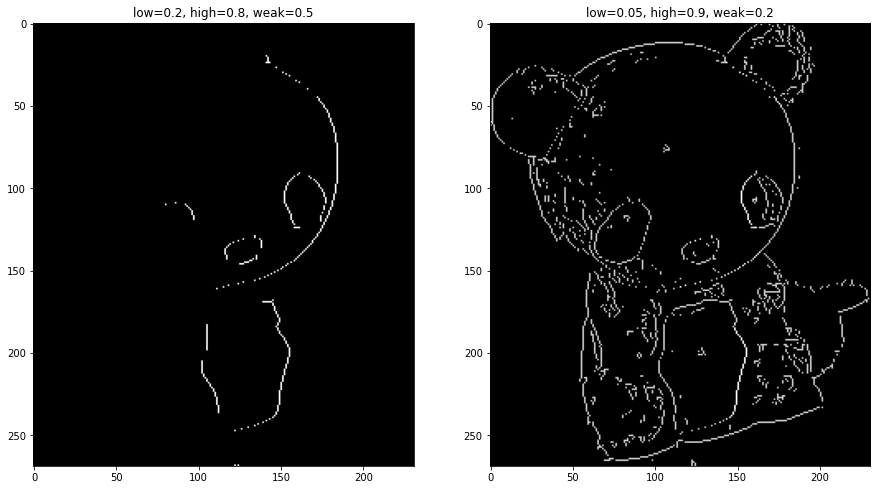

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15,15))

axes[0].imshow(hysteresis_output1, cmap='gray')
axes[0].set_title('low=0.2, high=0.8, weak=0.5')

axes[1].imshow(hysteresis_output2, cmap='gray')
axes[1].set_title('low=0.05, high=0.9, weak=0.2');